In [1]:
#多个
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 13  # 替换成你想要的字体大小
# 定义数据
eval_methods = ['kw_matching', 'harmbench','llamaguard']
models=['llama2','vicuna']
folders = ['_without_cosdecay_and_lasthiddenstate','_with_cosdecay_and_lasthiddenstate',\
    '_with_cosdecay_and_mean_sentemb','_without_cosdecay_and_mean_sentemb']

z={}

# 创建2x2子图
# 使用for循环绘制每个子图
for i, eval_method in enumerate(eval_methods):
    for j, model in enumerate(models):
        newmodel=model
        neweval_method=eval_method
        if model=='llama2':
            newmodel='Llama-2'
        if eval_method=='kw_matching':
            neweval_method='keyword matching'
        elif eval_method=='harmbench':
            neweval_method='HarmBench'
        elif eval_method=='llamaguard':
            neweval_method='Llama Guard'
        z[neweval_method+newmodel]=[]
        for folder in folders:
            path='/home/yjj/llm-attacks/experiments/'+model+folder+'/'
            rounds=os.listdir(path)
            dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
            for dirpath in dirpaths:
                for path in os.listdir(dirpath):
                    if path.endswith('log') and path.startswith('eval'):
                        al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                        if al==0:
                            with open(os.path.join(dirpath,path),'r') as alpha:
                                content=alpha.read()
                                res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                                res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                                prev=res[0][1]
                                for k in range(len(res)):
                                    if res[k][2]==0:
                                        res[k][1]=prev
                                    prev=res[k][1]
                                z[neweval_method+newmodel].append([k[1] for k in res])
        print(eval_method,model,z)

kw_matching llama2 {'keyword matchingLlama-2': [[0, 7, 11, 17, 18, 40, 32, 41, 40, 40, 40], [0, 1, 2, 48, 35, 55, 55, 55, 55, 55, 55], [0, 2, 4, 5, 4, 4, 4, 4, 5, 5, 5], [0, 19, 24, 33, 33, 29, 32, 32, 32, 32, 32], [0, 0, 5, 13, 34, 48, 37, 43, 37, 49, 49], [0, 1, 14, 13, 19, 26, 40, 40, 57, 57, 54], [0, 13, 51, 33, 26, 29, 20, 26, 26, 26, 22], [0, 2, 18, 8, 8, 14, 9, 12, 14, 14, 14], [0, 1, 1, 1, 1, 3, 10, 2, 2, 2, 2], [0, 1, 4, 12, 23, 32, 32, 32, 32, 32, 32], [0, 1, 10, 10, 15, 15, 14, 14, 14, 14, 17], [0, 1, 1, 1, 16, 7, 7, 24, 10, 9, 7]]}
kw_matching vicuna {'keyword matchingLlama-2': [[0, 7, 11, 17, 18, 40, 32, 41, 40, 40, 40], [0, 1, 2, 48, 35, 55, 55, 55, 55, 55, 55], [0, 2, 4, 5, 4, 4, 4, 4, 5, 5, 5], [0, 19, 24, 33, 33, 29, 32, 32, 32, 32, 32], [0, 0, 5, 13, 34, 48, 37, 43, 37, 49, 49], [0, 1, 14, 13, 19, 26, 40, 40, 57, 57, 54], [0, 13, 51, 33, 26, 29, 20, 26, 26, 26, 22], [0, 2, 18, 8, 8, 14, 9, 12, 14, 14, 14], [0, 1, 1, 1, 1, 3, 10, 2, 2, 2, 2], [0, 1, 4, 12, 23, 32, 32, 

In [2]:
z

{'keyword matchingLlama-2': [[0, 7, 11, 17, 18, 40, 32, 41, 40, 40, 40],
  [0, 1, 2, 48, 35, 55, 55, 55, 55, 55, 55],
  [0, 2, 4, 5, 4, 4, 4, 4, 5, 5, 5],
  [0, 19, 24, 33, 33, 29, 32, 32, 32, 32, 32],
  [0, 0, 5, 13, 34, 48, 37, 43, 37, 49, 49],
  [0, 1, 14, 13, 19, 26, 40, 40, 57, 57, 54],
  [0, 13, 51, 33, 26, 29, 20, 26, 26, 26, 22],
  [0, 2, 18, 8, 8, 14, 9, 12, 14, 14, 14],
  [0, 1, 1, 1, 1, 3, 10, 2, 2, 2, 2],
  [0, 1, 4, 12, 23, 32, 32, 32, 32, 32, 32],
  [0, 1, 10, 10, 15, 15, 14, 14, 14, 14, 17],
  [0, 1, 1, 1, 16, 7, 7, 24, 10, 9, 7]],
 'keyword matchingvicuna': [[0, 61, 64, 60, 56, 46, 50, 50, 50, 50, 50],
  [0, 71, 65, 59, 59, 59, 59, 59, 59, 59, 76],
  [0, 35, 45, 41, 42, 42, 42, 36, 47, 47, 47],
  [0, 28, 48, 62, 62, 43, 50, 42, 55, 55, 55],
  [0, 44, 56, 40, 44, 45, 38, 38, 53, 61, 61],
  [0, 39, 31, 47, 67, 64, 62, 62, 62, 62, 50],
  [0, 19, 33, 36, 36, 36, 33, 33, 33, 33, 33],
  [0, 52, 57, 63, 51, 65, 47, 47, 47, 47, 47],
  [0, 49, 28, 28, 38, 38, 38, 38, 38, 38, 38]

harmbench llama2 [(0, 27.666666666666668), (5, 47.333333333333336), (10, 31.333333333333332), (15, 15.666666666666666), (20, 23.666666666666668), (25, 33.0), (30, 33.666666666666664), (35, 12.0), (40, 10.333333333333334), (45, 27.0)]
harmbench llama2 26.0
harmbench vicuna [(0, 70.33333333333333), (5, 75.33333333333333), (10, 73.0), (15, 81.33333333333333), (20, 71.0), (25, 76.33333333333333), (30, 81.33333333333333), (35, 77.33333333333333), (40, 71.33333333333333), (45, 75.66666666666667)]
harmbench vicuna 75.85185185185185


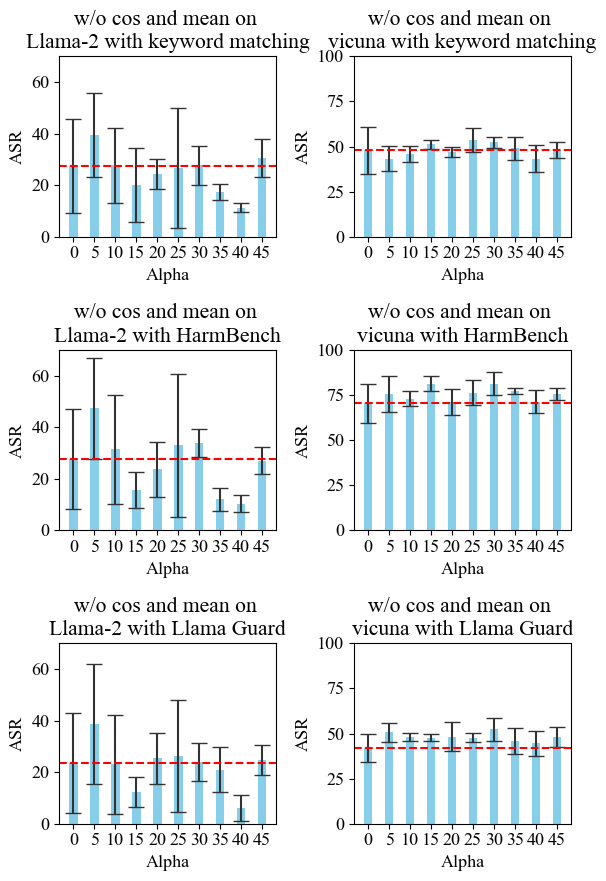

In [3]:
# 定义数据
eval_methods = ['kw_matching', 'harmbench','llamaguard']
models = ['llama2','vicuna']
folder='_without_cosdecay_and_mean_sentemb'

# 创建2x2子图
fig, axs = plt.subplots(len(eval_methods), len(models), figsize=(3*len(models), 3*len(eval_methods)))
# 使用for循环绘制每个子图
for i, eval_method in enumerate(eval_methods):
    for j, model in enumerate(models):
        newmodel=model
        neweval_method=eval_method
        if model=='llama2':
            newmodel='Llama-2'
        if eval_method=='kw_matching':
            neweval_method='keyword matching'
        elif eval_method=='harmbench':
            neweval_method='HarmBench'
        elif eval_method=='llamaguard':
            neweval_method='Llama Guard'
        x=[]
        y={}
        for al in range(0,50,5):
            y[al]=[]
        if hasattr(axs,'__len__'):
            ax = axs[i, j]
        else:
            ax=axs
        path='/home/yjj/llm-attacks/experiments/'+model+folder+'/'
        rounds=os.listdir(path)
        dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
        for dirpath in dirpaths:
            for path in os.listdir(dirpath):
                if path.endswith('log') and path.startswith('eval'):
                    al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                    if al!=0:
                        with open(os.path.join(dirpath,path),'r') as alpha:
                            content=alpha.read()
                            res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                            res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                            prev=res[0][1]
                            for k in range(len(res)):
                                if res[k][2]==0:
                                    res[k][1]=prev
                                prev=res[k][1]
                            x=[k[0] for k in res]
                            y[al].append([k[1] for k in res])
                    else:
                        y[al]=z[neweval_method+newmodel]
        # print(y)
        for al in range(0,50,5):
            # print(al)
            y[al]=np.array(y[al])

        mean_={}
        std_={}
        for al in range(0,50,5):
            mean_[al]=y[al].mean(0)
            std_[al]=y[al].std(0)
        mean__=np.array(list(mean_.values()))[:,-1]
        std__=np.array(list(std_.values()))[:,-1]
        # 使用 plt.bar() 函数创建柱形图
        bar_width = 2  # 设置条形的宽度
        bar_color = 'skyblue'  # 设置条形的颜色
        ax.bar(range(0,50,5), mean__,yerr=std__,width=bar_width,color=bar_color,error_kw = {'ecolor' : '0.2', 'capsize' :6 })
        # 添加标题和标签
        ax.set_title(f"w/o cos and mean on \n{newmodel} with {neweval_method}")
        ax.set_xlabel('Alpha')
        ax.set_ylabel('ASR')
        if model=='vicuna':
            ax.set_ylim(0,100)
        else:
            ax.set_ylim(0,70)        
        ax.set_xticks(range(0,50,5))
        ax.axhline(y=mean__[0],color='red', linestyle='--', label='Original GCG')
        # 显示图形
        if eval_method=='harmbench':
            print(eval_method,model,[(k,v[-1]) for k,v in mean_.items()])
        import numpy as np
        if eval_method=='harmbench':
            print(eval_method,model,np.mean([v[-1] for k,v in mean_.items() if k!=0]))
# 调整布局以防止重叠
plt.tight_layout()
plt.savefig(f'{folder}.png',dpi=600)
plt.show()